In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('opendata.csv', encoding='Windows 1251')

In [3]:
df.head()

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
params={}

In [6]:
name_arr = df['name'].unique()

In [7]:
reg_arr = df['region'].unique()

In [8]:
min_date = df['date'].min()
max_date = df['date'].max()

In [9]:
def get_date():
    year = int(input('Введите год:'))
    month = int(input('Введите месяц:'))
    day = int(input('Введите день:'))
    return datetime.date(year, month, day)

In [15]:
def get_dates():
    print(f'Введите дату начала из интервала {min_date} - {max_date}:')
    params['Начало периода'] = get_date()

    print(f'Введите дату окончания выборки из интервала {min_date} - {max_date}:')
    params['Конец периода'] = get_date()
    if params['Начало периода']>params['Конец периода']:
        print('Дата окончания периода не может быть меньше даты начала. Дата окончания изменена.')
        params['Начало периода']=params['Конец периода']
        print(params['Конец периода'])

In [16]:
def get_value(arr):
    num = 1
    for item in arr:
        print(f'{num} - {item}')
        num+=1
    param_val = int(input('Введите номер значения:'))
    return arr[param_val-1]       

In [17]:
print('Параметры:')
print('1 - тип данных')
print('2 - интервал дат')
print('3 - область')    

Параметры:
1 - тип данных
2 - интервал дат
3 - область


In [18]:
while True:
    param = int(input('Введите номер параметра:'))
    
    if param==1:
        if not params.get('Тип данных'): 
            params['Тип данных'] = get_value(name_arr)   
        else:
            val = params.get('Тип данных')
            print(f'Значение параметра "Тип данных" уже задано - {val}')
            ans = input('Ввести заново? (Y - да, N - нет)')
            if ans=='Y':
                params['Тип данных'] = get_value(name_arr)
    elif param==2:
        if not params.get('Начало периода'): 
            get_dates()
        else:
            val_1 = params.get('Начало периода')
            val_2 = params.get('Конец периода')
            print(f'Значение параметра "Интервал дат" уже задано - Начало периода: {val_1}, Конец периода: - {val_2}')
            ans = input('Ввести заново? (Y - да, N - нет)')
            if ans=='Y':
                get_dates()  
    elif param==3:
        if not params.get('Область'): 
            params['Область'] = get_value(reg_arr)   
        else:
            val = params.get('Область')
            print(f'Значение параметра "Область" уже задано - {val}')
            ans = input('Ввести заново? (Y - да, N - нет)')
            if ans=='Y':
                params['Область'] = get_value(reg_arr) 
    else:
        print('Введено некорректное значение параметра')
    
    
    ans = input('Ввод параметров завершен? (Y - да, N - нет)')
    if ans=='Y':
        break
        
print('Введены параметры:')
for item in params:
    print(f'{item} - {params[item]}')  
        

Введите номер параметра:1
Значение параметра "Тип данных" уже задано - Средняя зарплата
Ввести заново? (Y - да, N - нет)N
Ввод параметров завершен? (Y - да, N - нет)N
Введите номер параметра:2
Введите дату начала из интервала 2013-01-15 00:00:00 - 2019-01-15 00:00:00:
Введите год:2019
Введите месяц:01
Введите день:01
Введите дату окончания выборки из интервала 2013-01-15 00:00:00 - 2019-01-15 00:00:00:
Введите год:2019
Введите месяц:12
Введите день:31
Ввод параметров завершен? (Y - да, N - нет)N
Введите номер параметра:2
Значение параметра "Интервал дат" уже задано - Начало периода: 2019-01-01, Конец периода: - 2019-12-31
Ввести заново? (Y - да, N - нет)Y
Введите дату начала из интервала 2013-01-15 00:00:00 - 2019-01-15 00:00:00:
Введите год:2015
Введите месяц:01
Введите день:01
Введите дату окончания выборки из интервала 2013-01-15 00:00:00 - 2019-01-15 00:00:00:
Введите год:2019
Введите месяц:12
Введите день:31
Ввод параметров завершен? (Y - да, N - нет)Y
Введены параметры:
Тип данны

In [19]:
data=df
leg=''
if params.get('Тип данных'):
    data = data.loc[data['name']==params['Тип данных']]
    leg = leg + f"{params['Тип данных']}"

if params.get('Начало периода'):
    data = data.loc[data['date']>pd.Timestamp(params['Начало периода'])]
    leg = leg + f" с {params['Начало периода']}"
        
if params.get('Конец периода'):
    data = data.loc[data['date']<pd.Timestamp(params['Конец периода'])]    
    leg = leg + f" по {params['Конец периода']}"
    
if params.get('Область'):
    data = data.loc[data['region']==params['Область']]   
    leg = leg + f" - {params['Область']}"

In [20]:
target_mean = round(data['value'].mean(), 2)
target_median = data['value'].median()
target_mode = data['value'].mode()[0]

target_mean, target_median, target_mode

(29131.02, 25115.0, 19389)

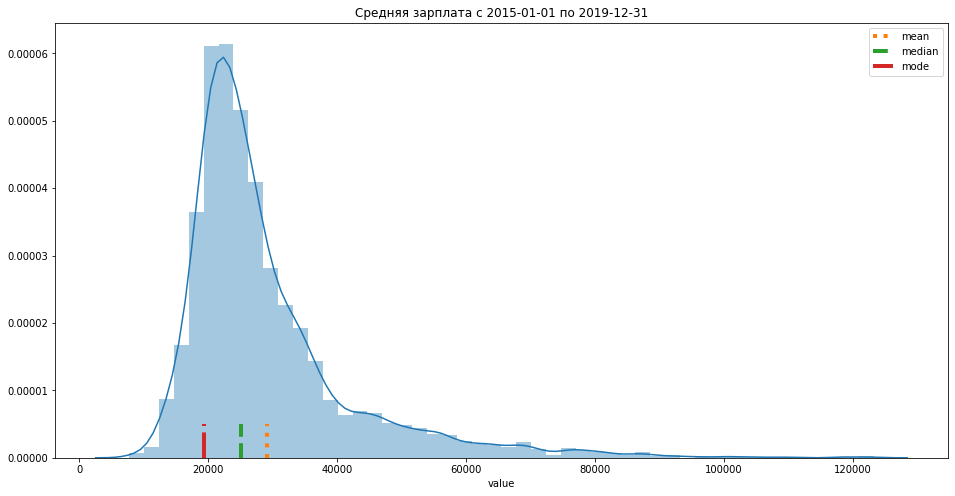

In [21]:
plt.figure(figsize = (16, 8))

sns.distplot(data['value'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title(leg)
plt.legend()
plt.show()

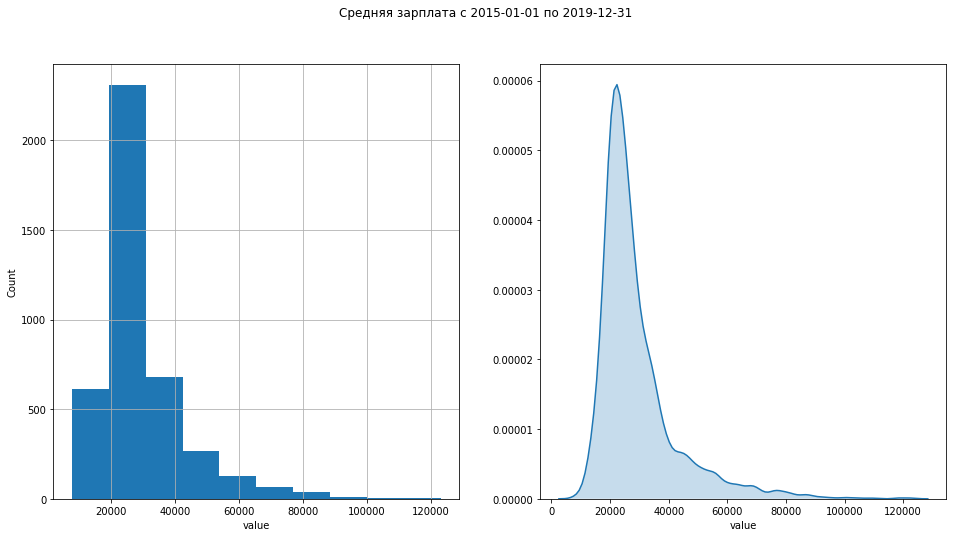

In [22]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
data['value'].hist()
plt.ylabel('Count')
plt.xlabel('value')

plt.subplot(122)
sns.kdeplot(data['value'], shade=True, legend=False)
plt.xlabel('value')

plt.suptitle(leg)
plt.show()